# Eigenface example

In [1]:
import numpy as np 
from scipy import misc                     # for loading image 
np.random.seed(1)


In [2]:
path = 'unpadded/' # path to the database 
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

h = 116 # height 
w = 98 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))

In [3]:
# collect all data
# 
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = misc.imread(fn).reshape(D)
        cnt += 1 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be 

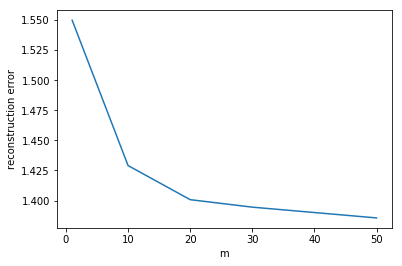

In [4]:
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

def asd(k):
    pca = PCA(n_components=k) # k = 100 
    pca.fit(X.T)
# projection matrix 
    U = pca.components_.T
    for i in range(U.shape[1]):
        
        fn = 'eigenface' + str(i).zfill(2) + '.png'
        
    for person_id in range(1, 2):
        for state in ['centerlight']:
            fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
            im = misc.imread(fn)
        
            fn = 'ori' + str(person_id).zfill(2) + '.png'
          
        # reshape and subtract mean, don't forget 
            x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
            z = U.T.dot(x)
        #decode
            x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
            im_tilde = x_tilde.reshape(116, 98)
#         plt.imshow(im_tilde, interpolation='nearest' )
          
            fn = 'res' + str(person_id).zfill(2) + '.png'
        sum=0
        for i in range(x.shape[0]):
            sum+=(x_tilde[i][0]-x[i][0])**2
        s=1/im.size*np.sqrt(sum)
        return s

xPoints = [1,10,20,30,50]
yPoints = [asd(1),asd(10),asd(20),asd(30),asd(50)]
plt.plot(xPoints,yPoints)
plt.xlabel('m')
plt.ylabel('reconstruction error')
plt.show()